## Linear Regression - Exercise 02
## Objective: Country .......
## by Luis Urso
## USP/ESALQ Data Science, MBA

In [1]:
## Import Required Libraries for the whole script  

import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [2]:
## Load the Country Dataset

df_countries = pd.read_csv('paises.csv', delimiter=',', encoding="utf-8")
df_countries

## See the Country Dataset Structure

df_countries.info()

## See the Univariate Stats

df_countries.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    50 non-null     object 
 1   cpi     50 non-null     float64
 2   idade   50 non-null     int64  
 3   horas   50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


,cpi,idade,horas
count,50.000000,50.000000,50.000000
mean,4.894000,60.480000,32.660000
std,2.678974,10.022913,2.431091
min,0.800000,34.000000,26.799999
25%,2.575000,58.000000,31.400000
50%,3.950000,62.000000,32.600000
75%,7.475000,66.750000,34.400000
max,9.300000,79.000000,38.099998


In [4]:

## Makes a 3D Scatter Plot

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df_countries['horas'], 
    y=df_countries['idade'], 
    z=df_countries['cpi'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))
plot_figure.show()

<Figure size 1500x1000 with 0 Axes>

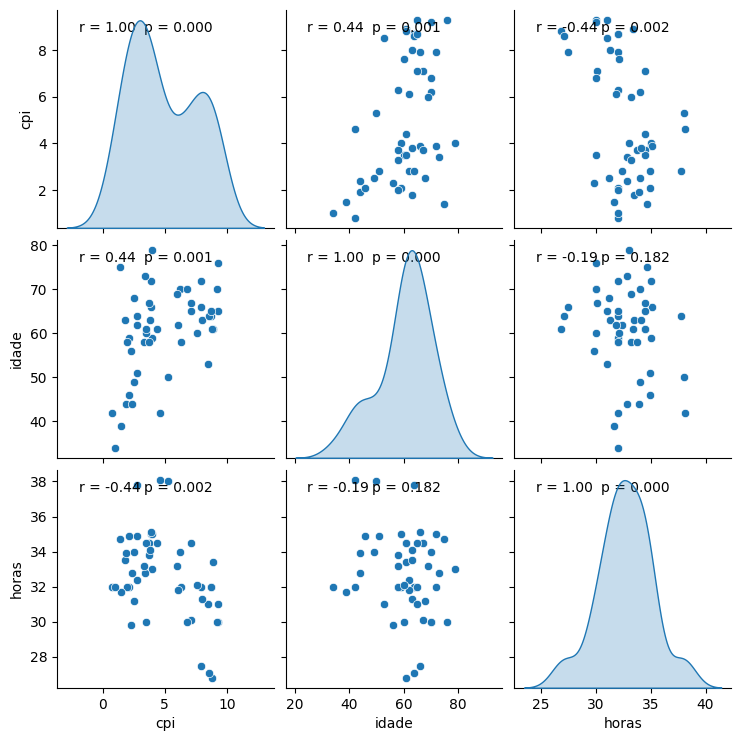

In [6]:
## Crossed Variables Scatter & Distribution

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_countries, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [9]:
## Estimating an OLS Model for multiple variables CPI in functions of IDADE + HORAS 
model_countries = sm.OLS.from_formula("cpi ~ idade + horas", df_countries).fit()

## Checking Model Parameters
model_countries.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cpi   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     11.26
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           0.000101
Time:                        12:30:45   Log-Likelihood:                -109.93
No. Observations:                  50   AIC:                             225.9
Df Residuals:                      47   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9719      5.165      2.318      0.025       1.581      22.363
idade          0.0997      0.033      3.052      0.004       0.034       0.165
horas         -0.4013      0.135     -2.980      0.005      -0.672      -0.130
==============================================================================
Omnibus:                        3.389   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.762
Skew:                           0.131   Prob(JB):                        0.414
Kurtosis:                       2.119   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:

# View the CI at 95% 
model_countries.conf_int(alpha=0.05)

,0,1
Intercept,1.580527,22.363308
idade,0.033986,0.165410
horas,-0.672256,-0.130418


In [12]:
## Saving Fitted Values to the Original Datase 
df_countries['cpifit'] = model_countries.fittedvalues
df_countries

,pais,cpi,idade,horas,cpifit
0,Argentina,3.9,72,35.000000,5.103394
1,Australia,8.7,64,32.000000,5.509820
2,Austria,7.9,72,32.000000,6.307404
3,Belgium,7.1,67,30.100000,6.571454
4,Brazil,4.0,59,35.000000,3.807319
5,Canada,8.9,61,33.400002,4.648853
6,Chile,6.2,70,34.000000,5.305335
7,China,2.5,49,34.000000,3.211674
8,Colombia,4.0,79,33.000000,6.603954
9,Cyprus,6.3,58,32.000000,4.911631


In [15]:
## View 3D Graph with Fitted Values

trace = go.Scatter3d(
    x=df_countries['horas'], 
    y=df_countries['idade'], 
    z=df_countries['cpi'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    xaxis_title='X AXIS TITLE',
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_countries['horas'], 
                    y=df_countries['idade'], 
                    z=df_countries['cpifit'], 
                    opacity=0.5,
                    color='pink'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='horas',
                        yaxis_title='idade',
                        zaxis_title='cpi'))
plot_figure.show()